In [1]:
# import required packages
import spotipy  # use terminal to pip install PyLyrics
import numpy
from spotipy.oauth2 import SpotifyClientCredentials

# setup with spotify API
# find client_id etc. post creating your app on spotify
username='your-uname'
client_id = 'your-client-id'
client_secret = 'your-client-secret'

# update the settings on the app page of spotify to get uri, scope etc.
# use those credentials for calling data from spotify's API
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

# set spotify client credentials to sp to be used for further coding
# accessing tracks and such, check spotipy documentation for reference:
# https://spotipy.readthedocs.io/en/2.9.0/#api-reference
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# selected artist for analysis - Bob Dylan 
# want just the artist Bob Dylan from a list of artists matching the name Bob or Dylan 
# use uri specific to Bob Dylan at position 0 of the list 
name = "Bob Dylan" #chosen artist
result = sp.search(q='artist:' + name, type='artist') #search query
#result["artists"]["items"][0]
artist_uri = result["artists"]["items"][0]["uri"] #'spotify:artist:74ASZWbe4lXaubB36ztrGX'

#set limit and offset - need to loop through to get the entire list of tracks/albums for Bob Dylan 
limit=50
offset=0
# Store artist's albums' uris in a list
album_uris = []


# Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, limit=limit, offset=offset)

for i in range(len(sp_albums['items'])):
    album_uris.append(sp_albums['items'][i]['uri'])   

while len(album_uris) < sp_albums["total"] :
    offset+=limit
    sp_albums = sp.artist_albums(artist_uri, limit=limit, offset=offset)

    for i in range(len(sp_albums['items'])):
        album_uris.append(sp_albums['items'][i]['uri'])
album_uris

#album_uris


['spotify:album:1euXUeJobzra05wyBIrdtH',
 'spotify:album:7I8ARvRuRzDghzsItBARZK',
 'spotify:album:7udgQ8bay1Roa8bBsA6246',
 'spotify:album:5faKzawYFUfk3IRRe6ERXl',
 'spotify:album:3ndKursZKjdkhOKSkwHDLW',
 'spotify:album:3JNLQ0r6jHvyJYeAuzPSBw',
 'spotify:album:5coSubIBt21W8V40Po41pY',
 'spotify:album:4KycgSP4ir08AgS8ux9TAE',
 'spotify:album:3wjymdW6uOqrgCLWBb6ph4',
 'spotify:album:2mVpSZrllFAWhOgCoyz8ow',
 'spotify:album:3LnS0XKSzd2TFoagESGUw3',
 'spotify:album:6Ylr6c6snKHzMBaZHXHEWm',
 'spotify:album:5mVEtOa0CmXH5nCivFoa4x',
 'spotify:album:304a9IyZHyhs14vYKSyzuy',
 'spotify:album:6y2WHyqRUCeHrjMXvjnRmD',
 'spotify:album:4BcfuxQ4EO07Y53yr6YhAJ',
 'spotify:album:7tYQ0K4JZZm88WXF1pleZU',
 'spotify:album:185DHT5SvszXRrezx3lOjt',
 'spotify:album:0zTd4xTpA9ytGuH3Gnfnn4',
 'spotify:album:6lfZX6OFJRxRcODaxwSRL5',
 'spotify:album:4OIFBxR56S44aXiovovyK7',
 'spotify:album:0ELQw29ii1k2eHnAYgt5kw',
 'spotify:album:5aRiLRWxWoAT6rTUXbGUuI',
 'spotify:album:18ue4s9PsV3WBw7kkzD689',
 'spotify:album:

In [2]:
len(album_uris)

81

In [3]:
# get all album tracks using the uri

def albumSongs(uri):
    album = uri #assign album uri to a_name
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        artist_tracks[tracks['items'][n]['uri']] = {}

        
artist_tracks = {}

for i in album_uris: #each album
    albumSongs(i)
artist_tracks


{'spotify:track:2Qvk0G9HvOtsycOnK7fvLB': {},
 'spotify:track:4pMuZSy1C2FoJXLv73poP0': {},
 'spotify:track:3GHqs9lItLiAHp1kFjULN9': {},
 'spotify:track:17vwypfiO0MOENOLqw0kpU': {},
 'spotify:track:46gb7fjpnYkLFoFIWTQQVn': {},
 'spotify:track:6XPSO6H90stw5Wd2c66Xos': {},
 'spotify:track:3XQcN8lRz5uGWnkMdo8NC5': {},
 'spotify:track:672PNEfhkICYooZ3IOPoWi': {},
 'spotify:track:0CS4pwHml8LCSdVJ1gIKU3': {},
 'spotify:track:3bM1p9F6b4btWTAO9IgXcb': {},
 'spotify:track:5qJwIIlBhKafAfCnbJHvoY': {},
 'spotify:track:3w5ecYEMUouguLjRh7CvsB': {},
 'spotify:track:54kJQb15wTK67vkFuOo663': {},
 'spotify:track:5tjtcbyYUVjLsFBEpevxgR': {},
 'spotify:track:4wZtl1YXpVfsostikIY6zT': {},
 'spotify:track:0gYHafy5UdwbIHPLyL0gYa': {},
 'spotify:track:5QLlXEeEJwMbTCqb0TLbUF': {},
 'spotify:track:4IWLbLZ6oLvsJIuXBVQamN': {},
 'spotify:track:3P6aVIfUQaEqwfaJV5O3ct': {},
 'spotify:track:6vBNL1AbwqrM4lezscrBv0': {},
 'spotify:track:4LglcBs3BnKQ2KPf7v3txt': {},
 'spotify:track:3xHwiV7qeFejcYyKHF92uT': {},
 'spotify:

In [4]:
len(album_uris)

81

In [5]:
# get all tracks' release dates from the albums 
track_names=[]
track_album_release_dates = []
for i in artist_tracks:
    track = sp.track(i)
    track_names.append(track["name"])
    track_album_release_dates.append(track["album"]["release_date"])



retrying ...3secs
retrying ...2secs
retrying ...3secs
retrying ...2secs
retrying ...3secs
retrying ...2secs
retrying ...3secs
retrying ...2secs
retrying ...2secs
retrying ...3secs


In [15]:
# create dataframes
import pandas as pd
dat = pd.DataFrame()
dat['track_name'] = track_names
dat['release_date'] = track_album_release_dates


In [16]:
dat.shape

(1180, 2)

In [17]:
# ignore live, remix and deluxe album versions
# Credit:
mask = [('live' not in s.lower() and 'deluxe' not in s.lower()
         and 'remix' not in s.lower() and 'rmx' not in s.lower()
        and 'remastered' not in s.lower() and 'take 2' not in s.lower() and 
        'take 3' not in s.lower() and 'take 4' not in s.lower() and 
        'take 5' not in s.lower() and 'take 6' not in s.lower() and 
         'take 7' not in s.lower() and 'take 8' not in s.lower()
        and 'take 11' not in s.lower() and 'take 13' not in s.lower()) for s in dat.track_name.values]
dat = dat[mask]
dat.shape


(821, 2)

In [18]:
# import more packages 
from PyLyrics import *  # use terminal to pip install PyLyrics
import re
import nltk
import os


In [19]:
# get lyrics from tracks iterating over each track 
track_lyrics = []
for i in dat.track_name.values:
    try:
        lyrics = PyLyrics.getLyrics('Bob Dylan',i)
        track_lyrics.append(lyrics)
    except:
        # sometimes this may not work (e.g. songs recorded live do not have lyrics stored)
        track_lyrics.append('exception')
dat['lyrics'] = track_lyrics


In [21]:
dat.shape

(821, 3)

In [22]:
# ignore exceptions
mask = [('exception' != s.lower()) for s in dat.lyrics.values]
dat = dat[mask]
dat.shape


(572, 3)

In [23]:
# check new dataset
dat

,track_name,release_date,lyrics
25,She Belongs to Me,2019-01-23,"She's got everything she needs, she's an artis..."
26,I Want You,2019-01-23,"The guilty undertaker sighs, the lonesome orga..."
27,Tangled up in Blue,2019-01-23,"Early one morning, the sun was shining\nI was ..."
29,If Not for You,2019-01-23,"If not for you\nBabe, I couldn't find the door..."
30,Make You Feel My Love,2019-01-23,When the rain is blowing in your face\nAnd the...
31,Sweetheart Like You,2019-01-23,"Well, the pressure's down, the boss ain't here..."
32,"Lay, Lady, Lay",2019-01-23,"Lay, lady, lay, lay across my big brass bed\nL..."
33,I'll Be Your Baby Tonight,2019-01-23,"Close your eyes, close the door\nYou don't hav..."
34,Love Minus Zero,2019-01-23,"My love, she speaks like silence\nWithout idea..."
35,Girl from the North Country (with Johnny Cash),2019-01-23,If you're traveling in the north country fair\...


In [24]:
# import packages
import nltk
import re
import string
import numpy as np

In [17]:
# start with text analysis - data munging 
# clean the lyrics and make a corpus for each album

# convert pd to csv 
bob_dylan_lyrics = dat.to_csv("~/Case_Studies/lyrics.csv")

In [18]:
# read in csv 
bob_dylan_lyrics = pd.read_csv("~/Case_Studies/lyrics.csv", index_col=False)

In [29]:
# remove punctuation
punctuation = re.compile('[%s]' % re.escape(string.punctuation))


def remove_punctuation(doc):
    return punctuation.sub('', doc.lower())


bob_dylan_lyrics['processed_text'] = np.vectorize(remove_punctuation)(bob_dylan_lyrics['lyrics'])

# remove stop words
stop_words = nltk.corpus.stopwords.words('english')

for index, row in bob_dylan_lyrics.iterrows():
    bob_dylan_lyrics.at[index, 'processed_text'] = ' '.join([term for term in bob_dylan_lyrics.loc[index, 'processed_text'].split()
                                                      if term not in stop_words])

# stem
porter = nltk.stem.porter.PorterStemmer()

for index, row in bob_dylan_lyrics.iterrows():
    bob_dylan_lyrics.at[index, 'processed_text'] = ' '.join([porter.stem(term) for term
                                                      in bob_dylan_lyrics.loc[index, 'processed_text'].split()])

In [30]:
# tokenize
bob_dylan_lyrics['tokenized'] = ''
bob_dylan_lyrics['tokenized'] = bob_dylan_lyrics['tokenized'].astype(object)

In [31]:
# write new csv post text parsing
bob_dylan_lyrics.to_csv('/Users/Chandni/Documents/Education/NCSU/MSA/Case_Studies/lyrics_processed.csv')

In [39]:
# import packages for creating word cloud
from wordcloud import WordCloud
import matplotlib.pylab as plt

In [36]:
# column to use for word cloud 
fields = ['processed_text']
bd_lyrics = pd.read_csv('/Users/Chandni/Documents/Education/NCSU/MSA/Case_Studies/lyrics_processed.csv', usecols=fields)



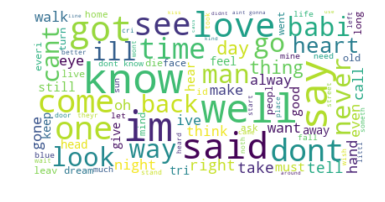

In [46]:
# cretae wordcloud
bd_wordcloud = WordCloud().generate(' '.join(bd_lyrics['processed_text']))

# manually pass computed frequencies of words to cloud 
# WordCloud.generate_from_frequencies

# lower max_font_size, change the maximum number of word and lighten the background:
bd_wordcloud_1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(bd_lyrics['processed_text']))
plt.figure()

plt.imshow(bd_wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [47]:
# Save the image in the img folder:
bd_wordcloud_1.to_file("~/Case_Studies/bd_wordcloud_V1.png")

In [28]:
# import more required packages 
import datetime
import pandas as pd

# need year for sentiment analysis and trend analysis 
# extract year from release date column 
# convert back csv to dataframe for year extraction and year concatenations
bd_lyrics = pd.read_csv('~/Case_Studies/lyrics_processed.csv')
lyrics_df = pd.DataFrame(bd_lyrics)

lyrics_df.shape

# need year for sentiment analysis and trend analysis 
# extract year from release date column 
# convert back csv to dataframe for year extraction and year concatenations
lyrics_df['release_year'] = pd.DatetimeIndex(lyrics_df['release_date']).year
lyrics_df.head()

# create csv to check

# check tail also since dates provided in year format only  
lyrics_df.tail()

,Unnamed: 0,Unnamed: 0.1,track_name,release_date,lyrics,processed_text,tokenized,release_year
567,567,1175,Mr. Tambourine Man,1967,"Hey, Mr. Tambourine Man, play a song for me\nI...",hey mr tambourin man play song im sleepi place...,NaN,1967
568,568,1176,Subterranean Homesick Blues,1967,Johnny's in the basement\nMixing up the medici...,johnni basement mix medicin im pavement think ...,NaN,1967
569,569,1177,I Want You,1967,"The guilty undertaker sighs, the lonesome orga...",guilti undertak sigh lonesom organ grinder cri...,NaN,1967
570,570,1178,Positively 4th Street,1967,You got a lotta nerve\nTo say you are my frien...,got lotta nerv say friend stood grin got lotta...,NaN,1967
571,571,1179,Just Like a Woman,1967,Nobody feels any pain\nTonight as I stand insi...,nobodi feel pain tonight stand insid rain ever...,NaN,1967


In [29]:
# group all processed text (lyrics that have been processed) for every year in a separate row
# i.e. merge rows for same years 

# select only two columns from df for further analysis
# select two columns 
text_date_df = lyrics_df[['processed_text', 'release_year']] 
text_date_df.head()
# text_date_df.tail()

text_date_df.shape



(572, 2)

In [30]:
# create and check with a small subset of data first - select first two rows only
test_df = text_date_df[0:3]

#test_df.shape
test_df.head()


,processed_text,release_year
0,she got everyth need she artist dont look back...,2019
1,guilti undertak sigh lonesom organ grinder cri...,2019
2,earli one morn sun shine lay bed wonder shed c...,2019


In [31]:
# merge rows for same years for test data set
grouped_test_df = test_df.groupby(['release_year'], as_index = False).agg({'processed_text': ' ' .join})

#grouped_test_df.shape
grouped_test_df.head()

,release_year,processed_text
0,2019,she got everyth need she artist dont look back...


In [44]:
# write test data to csv to check
grouped_test_df.to_csv('~/Case_Studies/grouped_test_df.csv')

In [32]:
# merge rows for same years for entire data set
grouped_text_date_df = text_date_df.groupby(['release_year'], as_index = False).agg({'processed_text': ' ' .join})



In [33]:
# check shape
grouped_text_date_df.shape


(39, 2)

In [27]:
# write to ENTIRE date set to csv to check
grouped_text_date_df.to_csv('~/Case_Studies/grouped_all_data_df.csv')

NameError: name 'grouped_text_date_df' is not defined

In [34]:
grouped_text_date_df.head()

,release_year,processed_text
0,1962,well dont know love like nobodi world get alon...
1,1963,mani road must man walk call man mani sea must...
2,1964,aint lookin compet beat cheat mistreat simplif...
3,1965,upon time dress fine threw bum dime prime didn...
4,1966,well got troubl troubl mind ye got troubl trou...


In [35]:
# import more packages 
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer



In [36]:
#import SentimentIntensityAnalyzer class 
#from vaderSentiment.vaderSentiment module. 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [37]:
# check only for positive sentiment first 
sid = SentimentIntensityAnalyzer()

for index, row in grouped_text_date_df.iterrows():
    grouped_text_date_df.at[index, 'positive'] = sid.polarity_scores(grouped_text_date_df.loc[index, 'processed_text'])['pos']
    

lyrics_year = grouped_text_date_df.groupby(['release_year'])['positive']

In [38]:
lyrics_year

In [39]:
lyrics_year.head()

0     0.183
1     0.155
2     0.142
3     0.146
4     0.152
5     0.183
6     0.238
7     0.139
8     0.132
9     0.168
10    0.127
11    0.132
12    0.140
13    0.183
14    0.137
15    0.299
16    0.220
17    0.171
18    0.218
19    0.181
20    0.135
21    0.128
22    0.163
23    0.158
24    0.175
25    0.120
26    0.180
27    0.156
28    0.170
29    0.347
30    0.192
31    0.139
32    0.184
33    0.161
34    0.183
35    0.249
36    0.244
37    0.190
38    0.205
Name: positive, dtype: float64

In [40]:
# check for positive and negative sentiment and create final dataset for sentiment analysis
sid = SentimentIntensityAnalyzer()

# create new df to prevent error
new_grouped_data = grouped_text_date_df

for index, row in new_grouped_data.iterrows():
    new_grouped_data.at[index, 'positive'] = sid.polarity_scores(new_grouped_data.loc[index, 'processed_text'])['pos']
    new_grouped_data.at[index, 'negative'] = sid.polarity_scores(new_grouped_data.loc[index, 'processed_text'])['neg']
    

lyrics_year = grouped_text_date_df.groupby(['release_year'])['positive', 'negative']


In [41]:
lyrics_year.head()

,positive,negative
0,0.183,0.178
1,0.155,0.149
2,0.142,0.161
3,0.146,0.122
4,0.152,0.115
5,0.183,0.108
6,0.238,0.074
7,0.139,0.118
8,0.132,0.141
9,0.168,0.168


In [42]:
# check new data sets shape for this should include the positive and negative columns 
new_grouped_data.shape

(39, 4)

In [44]:
new_grouped_data.head()

,release_year,processed_text,positive,negative
0,1962,well dont know love like nobodi world get alon...,0.183,0.178
1,1963,mani road must man walk call man mani sea must...,0.155,0.149
2,1964,aint lookin compet beat cheat mistreat simplif...,0.142,0.161
3,1965,upon time dress fine threw bum dime prime didn...,0.146,0.122
4,1966,well got troubl troubl mind ye got troubl trou...,0.152,0.115


In [45]:
# write to this sentiment analysis data set to csv for creating visualization in tableau
new_grouped_data.to_csv('~/Case_Studies/Spotify_Senti_Analysis.csv')